In [1]:
#replicate
set.seed(110)
sims = 1000

#define different values of n to iterate over
n = 2:10

#set paths for the empirical and analytical solutions
sol.a = rep(NA, length(n))
sol.e = rep(NA, length(n))

In [2]:
#iterate over n
for(j in 1:length(n)){
  
  #first, calculate the analytical solution
  k = 1:n[j]
  sol.a[j] = sum((1/factorial(k))*(-1)^(k + 1))
  
  #now run the empirical simulation
  #indicate if we get a match or not
  match = rep(0, sims)
  
  #run the loop
  for(i in 1:sims){
    
    #generate the 'random order' to give the babies out
    babies = sample(1:n[j])
    
    #calculate 'ratios' of couple-to-baby. If the couple gets
    #   their baby, ratio should be 1
    ratios = babies/(1:n[j])
    
    #see if we got a match (at least 1 ratio is 1)
    if(length(ratios[ratios == 1]) > 0){
      match[i] = 1
    }
  }
  
  #mark the empirical probability
  sol.e[j] = mean(match)
}

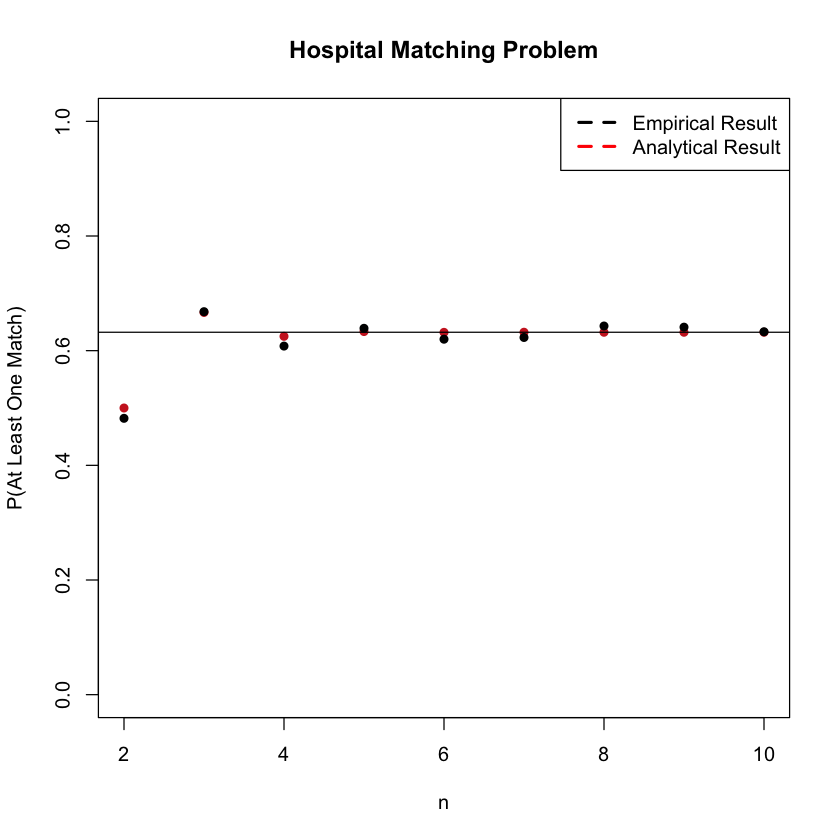

In [3]:
#graphics
plot(n, sol.a, main = "Hospital Matching Problem",
     xlab = "n", ylab = "P(At Least One Match)",
     type = "p", lwd = 3, col = "firebrick3",
     ylim = c(0, 1), pch = 16)
lines(n, sol.e, col = "black", lwd = 3, 
  type = "p", pch = 16)

#put in the asymptotic result
abline(h = 1 - 1/exp(1))

#legend
legend("topright", legend = c("Empirical Result", "Analytical Result"),
       lty=c(2,2), lwd=c(2.5,2.5),
       col=c("black", "red"))